In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

from milligrad.module import Module
from milligrad.tensor import Tensor, topological_sort

from matplotlib import pyplot as plt

In [2]:
class MLP(Module):
    def __init__(self):
        self.w1 = Tensor.xavier(3, 20)
        self.w2 = Tensor.xavier(20, 2)
        self.b1 = Tensor.randn(20)
        self.b2 = Tensor.randn(2)
        
    def __call__(self, x):
        x = x @ self.w1 + self.b1
        x = x.relu()
        x = x @ self.w2 + self.b2
        return x.tanh()
    
    def parameters(self) -> list[Tensor]:
        return [self.w1, self.w2, self.b1, self.b2]
    
class Perceptron(Module):
    def __init__(self):
        self.w = Tensor.randn(3, 2)
        self.b = Tensor.randn(2)
        
    def __call__(self, x):
        return x @ self.w + self.b
    
    def parameters(self) -> list[Tensor]:
        return [self.w, self.b]

In [12]:


b = Tensor.randn(3, name="bias")
w = Tensor.randn(2, 3, name="weight")
x = Tensor.randn(5, 2, name="input")
y = (x @ w + b).relu()

# operations are recorded to perform backpropagation
# the order below is the order in which we bacpropagate
sorted_tensors = reversed(topological_sort(y))
[x.name for x in sorted_tensors if x.name] # "" is falsy

['relu', '+', '@', 'input', 'weight', 'bias']

In [4]:
x = Tensor.randn(20, 3)
y = Tensor.ones(20, 2)

model = MLP()

losses = []
for i in range(1000):
    y_hat = model(x)
    loss = ((y - y_hat)**2).sum().sum()
    loss.backward()
    
    for param in model.parameters():
        param.data -= param.grad * 1e-3
        
    model.zero_grad()
    losses.append(loss.data)

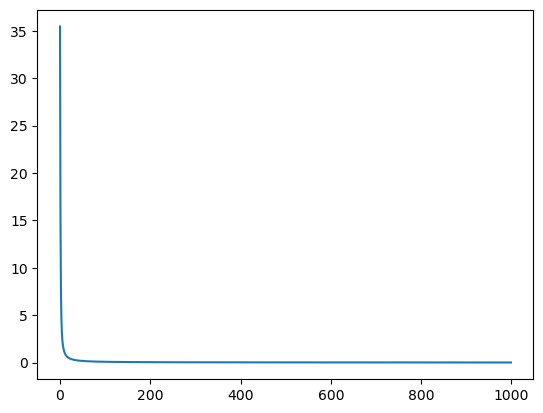

In [5]:
plt.plot(losses)

In [6]:
y_hat

array([[0.98433402, 0.99260895],
       [0.9872645 , 0.97704567],
       [0.99143591, 0.99361096],
       [0.97821914, 0.99441548],
       [0.9973245 , 0.97608671],
       [0.99722898, 0.98765938],
       [0.99024522, 0.98113974],
       [0.9835265 , 0.99499991],
       [0.99867642, 0.99435802],
       [0.99134437, 0.98672545],
       [0.99514381, 0.99571426],
       [0.97412877, 0.99762239],
       [0.97059928, 0.98859616],
       [0.99434814, 0.98163903],
       [0.99849847, 0.9910703 ],
       [0.99464743, 0.99527962],
       [0.97979941, 0.97318612],
       [0.9950205 , 0.99112773],
       [0.98681376, 0.99259214],
       [0.99150891, 0.99479777]])

In [7]:
# example of using no_grad
with Tensor.no_grad():
    y_hat = model(x)
    y_hat.backward()

AssertionError: No gradient tracking when in no_grad mode